In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans

In [32]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
sns.set_context('notebook')

data_path = Path('../data/MACH_data/data.cleaned.csv')

df = pd.read_csv(data_path)
print(f"Raw data shape: {df.shape}")
display(df.head())

Raw data shape: (73489, 105)


,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,5.0,12038.0,3.0,10.0,21089.0,1.0,8.0,7730.0,2.0,16.0,10618.0,4.0,12.0,10175.0,3.0,9.0,22181.0,3.0,18.0,35969.0,1.0,2.0,11265.0,5.0,14.0,10618.0,4.0,17.0,15993.0,1.0,15.0,11212.0,5.0,3.0,7331.0,2.0,19.0,9830.0,4.0,1.0,26415.0,4.0,4.0,9933.0,4.0,13.0,13578.0,4.0,11.0,36383.0,GB,49.0,328.0,426,6,5,6,1,7,3,7,4,7,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,2,3,1,1,26,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,15.0,5798.0,5.0,1.0,7301.0,1.0,8.0,3185.0,1.0,5.0,10833.0,4.0,2.0,5130.0,2.0,13.0,15996.0,1.0,6.0,8834.0,1.0,20.0,4113.0,5.0,14.0,3336.0,5.0,4.0,5882.0,2.0,10.0,6450.0,5.0,3.0,4467.0,1.0,19.0,4937.0,2.0,7.0,8267.0,4.0,12.0,4419.0,5.0,11.0,13532.0,3.0,18.0,13346.0,US,38.0,143.0,150,2,5,6,2,4,6,5,4,6,5,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,2,1,1,18,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,4.0,2733.0,5.0,9.0,5549.0,1.0,15.0,2097.0,1.0,1.0,4322.0,5.0,17.0,4563.0,1.0,11.0,3513.0,1.0,20.0,11082.0,1.0,6.0,7217.0,5.0,18.0,3286.0,5.0,19.0,4783.0,1.0,7.0,4200.0,5.0,3.0,4384.0,1.0,13.0,3115.0,1.0,10.0,32398.0,5.0,8.0,3084.0,5.0,5.0,4284.0,3.0,14.0,7537.0,US,4.0,143.0,157,1,7,6,7,5,7,1,4,1,4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2,1,15,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,4.0,4346.0,5.0,13.0,16775.0,1.0,20.0,4901.0,3.0,10.0,6365.0,2.0,5.0,6098.0,4.0,14.0,11333.0,2.0,6.0,17063.0,1.0,18.0,6680.0,5.0,15.0,6799.0,1.0,2.0,14912.0,1.0,19.0,2784.0,4.0,9.0,6233.0,1.0,8.0,4635.0,1.0,17.0,17987.0,5.0,16.0,7297.0,3.0,3.0,12788.0,4.0,11.0,14067.0,CH,60.0,191.0,269,6,5,5,7,7,2,6,2,2,3,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,4,3,2,2,31,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,4.0,4312.0,2.0,5.0,32253.0,1.0,10.0,7852.0,2.0,18.0,19931.0,4.0,17.0,9923.0,2.0,12.0,9615.0,2.0,3.0,14182.0,1.0,15.0,9492.0,4.0,20.0,15650.0,4.0,14.0,24308.0,1.0,8.0,7264.0,5.0,2.0,6081.0,1.0,6.0,5417.0,1.0,16.0,24339.0,4.0,11.0,7153.0,5.0,1.0,10697.0,1.0,9.0,21721.0,NL,37.0,302.0,334,2,5,5,6,7,6,5,3,4,5,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,2,1,2,20,360.0,640.0,1,4,3,60,1,1,2,Management


Choose Features:

In [33]:
question_responses = ["Q1A", "Q2A", "Q3A", "Q4A", "Q5A", "Q6A", "Q7A", "Q8A", "Q9A", "Q10A",
                      "Q11A", "Q12A", "Q13A", "Q14A", "Q15A", "Q16A", "Q17A", "Q18A", "Q19A", "Q20A"]

X = df[question_responses].copy()
print(f"Using features: {question_responses}")
print(f"Feature shape: {X.shape}")
display(X.head())

Using features: ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A']
Feature shape: (73489, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
0,3.0,3.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,5.0,4.0,1.0,5.0,2.0,4.0,4.0,4.0,4.0
1,5.0,5.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,5.0,1.0,2.0,4.0,5.0,3.0
2,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0
3,2.0,4.0,2.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0
4,5.0,5.0,2.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,1.0,4.0,5.0,1.0


Data Preprocessing:

In [34]:
clean_data = X.dropna().copy()
clean_data[question_responses] = clean_data[question_responses].astype(int)
print(f"Cleaned data shape (dropped NA): {clean_data.shape}")

mach_data = pd.DataFrame(clean_data, columns=question_responses, index=clean_data.index)
mach_sample = mach_data.sample(n=5000, random_state=42)

print(f"Sampled data shape: {mach_sample.shape}")
display(mach_sample.head())
display(mach_sample.describe().T.round(3))

Cleaned data shape (dropped NA): (73486, 20)
Sampled data shape: (5000, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
5860,2,1,3,4,4,3,2,2,3,3,3,4,5,3,5,3,1,5,4,4
61638,4,1,1,1,1,1,1,1,5,4,1,5,1,4,5,1,5,1,5,2
33684,5,5,2,3,5,2,2,2,1,4,1,5,4,2,3,2,2,5,5,5
32572,2,4,3,4,2,3,4,2,3,5,1,5,2,1,2,2,1,4,5,4
2493,2,4,4,2,3,3,3,4,5,4,2,2,1,2,3,3,2,4,3,4


,count,mean,std,min,25%,50%,75%,max
Q1A,5000.0,3.318,1.516,1.0,2.0,4.0,5.0,5.0
Q2A,5000.0,3.312,1.473,1.0,2.0,4.0,5.0,5.0
Q3A,5000.0,2.800,1.432,1.0,2.0,3.0,4.0,5.0
Q4A,5000.0,2.766,1.416,1.0,1.0,3.0,4.0,5.0
Q5A,5000.0,3.626,1.346,1.0,3.0,4.0,5.0,5.0
Q6A,5000.0,2.597,1.482,1.0,1.0,2.0,4.0,5.0
Q7A,5000.0,2.148,1.358,1.0,1.0,2.0,3.0,5.0
Q8A,5000.0,3.130,1.481,1.0,2.0,4.0,4.0,5.0
Q9A,5000.0,3.769,1.404,1.0,3.0,4.0,5.0,5.0
Q10A,5000.0,3.135,1.501,1.0,2.0,3.0,5.0,5.0


Standardize the Data:

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mach_sample)
X_scaled.shape

(5000, 20)

Function to Run Spectral Clustering:

In [36]:
def run_spectral(X, n_clusters):
    model = SpectralClustering(n_clusters=n_clusters, affinity='rbf', assign_labels='kmeans', random_state=42)
    labels = model.fit_predict(X)
    sil_score = silhouette_score(X, labels)

    print(f"Spectral Clustering with k = {n_clusters} clusters")
    print(f"Silhouette Score: {sil_score}")

    return labels, sil_score

Running Spectral with K = 2, 3, 4:

In [37]:
results = {}

for k in [2, 3, 4]:
    labels, sil = run_spectral(X_scaled, n_clusters=k)
    results[k] = (labels, sil)

Spectral Clustering with k = 2 clusters
Silhouette Score: 0.1500644632468726
Spectral Clustering with k = 3 clusters
Silhouette Score: 0.1601954810534863
Spectral Clustering with k = 4 clusters
Silhouette Score: 0.021869141375900274


Building a k-nearest-neighbors similarity graph, compute unnormalized laplacian:

In [ ]:
k = 15

W = kneighbors_graph(
    X_scaled,
    n_neighbors=k,
    mode='distance',
    include_self=False
)

W = 0.5 * (W + W.T)

In [ ]:
sigma = np.median(W.data)

W_sim = W.copy()
W_sim.data = np.exp(-(W_sim.data ** 2) / (2 * sigma ** 2))

In [69]:
L = csgraph.laplacian(W_sim, normed=True)
L

<COOrdinate sparse matrix of dtype 'float64'
	with 123182 stored elements and shape (5000, 5000)>

Extract First 2 Eigenvectors:

In [70]:
vals, vecs = eigsh(L, k=3, which='SM')
spectral_embedding = vecs[:, 1:3]

print("Embedding shape:", spectral_embedding.shape)

Embedding shape: (5000, 2)


Visualize Spectral Embedding with K=3:

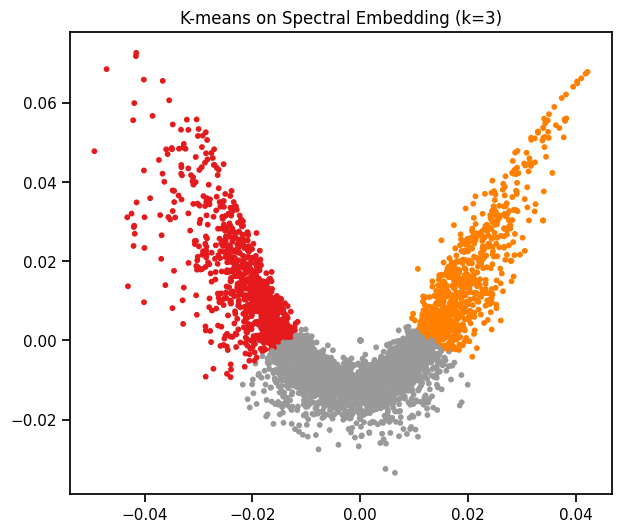

In [80]:
km = KMeans(n_clusters=3, random_state=42)
labels_k3 = km.fit_predict(spectral_embedding)

plt.figure(figsize=(7,6))
plt.scatter(
    spectral_embedding[:,0],
    spectral_embedding[:,1],
    c=labels_k3,
    cmap='Set1',
    s=10
)
plt.title("K-means on Spectral Embedding (k=3)")
plt.show()

Add clustering labels back to sampled data:

In [81]:
Xs_sample_with_labels = mach_sample.copy()
Xs_sample_with_labels['cluster'] = labels_k3

Compute MACH means per cluster:

In [82]:
cluster_means = Xs_sample_with_labels.groupby('cluster')[question_responses].mean().round(3)

print("Mean MACH item responses per cluster:")
display(cluster_means)

Mean MACH item responses per cluster:


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
cluster,,,,,,,,,,,,,,,,,,,,
0,1.762,1.958,3.801,3.983,2.334,4.143,3.562,1.978,4.865,4.406,2.554,2.243,1.593,3.145,2.358,3.664,2.956,2.287,3.606,1.476
1,4.637,4.473,1.566,1.491,4.610,1.325,1.193,4.279,1.866,1.610,1.121,4.721,4.289,1.309,4.485,1.566,1.575,4.544,4.638,3.615
2,3.424,3.402,2.826,2.743,3.742,2.482,1.992,3.167,3.934,3.158,1.652,3.851,2.953,2.004,3.494,2.438,2.361,3.698,4.449,2.393


Compute a MACH similarity score:

In [87]:
mach_high = np.array([
    5,5,1,1,5,1,1,5,1,1,
    1,5,5,1,5,1,1,5,5,5
])

X_mat = mach_sample[question_responses].to_numpy()

mach_distance = np.abs(X_mat - mach_high).sum(axis=1)

Xs_sample_with_labels['mach_score'] = mach_distance

Cluster level MACH scores:

In [88]:
cluster_mach_scores = Xs_sample_with_labels.groupby('cluster')['mach_score'].mean().round(3)

print("Average Machiavellianism Score per cluster (higher = more Mach):")
display(cluster_mach_scores)

Average Machiavellianism Score per cluster (higher = more Mach):


cluster
0    55.485
1    10.332
2    31.020
Name: mach_score, dtype: float64

Interpret clusters:

In [89]:
for c in cluster_mach_scores.index:
    print(f"\nCluster {c}:")
    print(f"  Mean Mach Score: {cluster_mach_scores[c]}")
    
    sorted_items = cluster_means.loc[c]
    print("  Highest-Mach items for this cluster:")
    print(sorted_items.sort_values(ascending=False).head(5))
    print("  Lowest-Mach items for this cluster:")
    print(sorted_items.sort_values().head(5))


Cluster 0:
  Mean Mach Score: 55.485
  Highest-Mach items for this cluster:
Q9A     4.865
Q10A    4.406
Q6A     4.143
Q4A     3.983
Q3A     3.801
Name: 0, dtype: float64
  Lowest-Mach items for this cluster:
Q20A    1.476
Q13A    1.593
Q1A     1.762
Q2A     1.958
Q8A     1.978
Name: 0, dtype: float64

Cluster 1:
  Mean Mach Score: 10.332
  Highest-Mach items for this cluster:
Q12A    4.721
Q19A    4.638
Q1A     4.637
Q5A     4.610
Q18A    4.544
Name: 1, dtype: float64
  Lowest-Mach items for this cluster:
Q11A    1.121
Q7A     1.193
Q14A    1.309
Q6A     1.325
Q4A     1.491
Name: 1, dtype: float64

Cluster 2:
  Mean Mach Score: 31.02
  Highest-Mach items for this cluster:
Q19A    4.449
Q9A     3.934
Q12A    3.851
Q5A     3.742
Q18A    3.698
Name: 2, dtype: float64
  Lowest-Mach items for this cluster:
Q11A    1.652
Q7A     1.992
Q14A    2.004
Q17A    2.361
Q20A    2.393
Name: 2, dtype: float64


## Interpretation of Results:

After running spectral clustering on the MACH data with k = 3, I identified 3 distinct clusters:
Cluster 0 - High Machiavellianism (MACH-distance of 55.485)
    - This suggests these respondents are:
        - Willing to manipulate others
        - Skeptical of people's motives
        - Consider deception sometimes necessary
Cluster 1 - Low Machiavellianism (MACH-distance of 10.332)
    - This suggests these respondents have:
        - High trust
        - Low cynicism
        Preference for honesty and straightforward behavior
Cluster 2 - Moderate Machiavellianism (MACH-distance of 31.02)
    - This suggests that these respondents might:
        - Occasionally use manipulation or strategic thinking
        - Be wary of fully trusting others
        - Use flexible morals depending on the situation

These three clusters reveal a non-linear structure in the MACH personality data that other clustering algorithms may miss.

The three clusters:
    - Align with psychological theory
    - Display meaningful differences in response patterns
    - Allow clear interpretation of the three MACH clusters

This argues that sometimes Machiavellianism might be better understood as a spectrum as opposed to categories, which spectral clustering is uniquely capable of.